# Encoding (Label encoding and One-hot encoding)


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Open 'grades.csv' and use appropriate encoding technique to convert to numerical data. 

### Here I used alphabetical order for label encoding. That is A-1, B-2 .... 

In [110]:
def label_encoding(column):
  j=0
  a=column.unique()
  a.sort()
  for i in a:
    column=column.replace(i,j+1)
    j=j+1
  Labeled_data=column
  return Labeled_data

In [112]:
df = pd.read_csv("grades.csv")
df['Grades']=label_encoding(df['Grades'])
df

,Name,Grades
0,Nilesh,1
1,Jhon,6
2,James,3
3,Ravi,5
4,Sita,6
5,Raju,4
6,Praful,5
7,Ganga,2
8,Ram,1
9,Rahim,6


### According to IITM grades.

In [113]:
df = pd.read_csv("grades.csv")
df['Grades']=df['Grades'].map({'S':10,'A':9,'B':8,'C':7,'D':6,'E':4,'F':0})
df

,Name,Grades
0,Nilesh,9
1,Jhon,10
2,James,7
3,Ravi,0
4,Sita,10
5,Raju,4
6,Praful,0
7,Ganga,8
8,Ram,9
9,Rahim,10


Answer the following for both the data 

- **What are the categories in the data?**

Ans: The Categories in this data are the grades of different students. [S,A,B,C,D,E,F]
- **what is the relationship between different categories in the grades column?**

Ans: The Grades have a specific order, because S is greater than A and so on. S>A>B>C>D>E>F 
- **Which encoding to be used Label encoding or one-hot encoding?**

Ans: Label Encoding is used here. Because of its order. One-hot can also be used. 



Open 'colors.csv' and use appropriate encoding technique to convert to numerical data

### Here One-Hot Encoding is used

In [175]:
def onehot(column):
  a=column.unique()
  a.sort()
  b=[]
  for i in column:
    b.append(np.where(a==i)[0][0])
  data=np.array(b)  
  shape = (data.size, data.max()+1)
  one_hot = np.zeros(shape)
  rows = np.arange(data.size)
  one_hot[rows,data] = 1
  c=pd.DataFrame(one_hot,columns=a)
  return c 

In [179]:
df = pd.read_csv("color.csv")
onehot(df['Color'])

,Blue,Green,Red,Yellow
0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0
5,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,1.0


## Complete dataframe


In [182]:
a=df.drop(['Color'],axis=1)
pd.concat([a, onehot(df['Color'])], axis=1)

,Objects,Blue,Green,Red,Yellow
0,Leaves,0.0,1.0,0.0,0.0
1,Blood,0.0,0.0,1.0,0.0
2,Sea,1.0,0.0,0.0,0.0
3,Rose,0.0,0.0,1.0,0.0
4,Sun flower,0.0,0.0,0.0,1.0
5,Apple,0.0,0.0,1.0,0.0
6,Mango,0.0,0.0,0.0,1.0
7,Banana,0.0,0.0,0.0,1.0



- **What are the categories in the data?**

Ans: The categories are the colors of different objects.['Blue','Green','Red','Yellow']

- **what is the relationship between different categories in the column?**

Ans: There is no specific relationship, each color is different and are not comparable. Hence, each must be given equal numbering. (Usually 1)

- **Which encoding to be used Label encoding or one-hot encoding?**

Ans: One-hot encoding is used in this case. Because the colors are not comparable and hence each must have equal numbering. 










# Regularized Least Squares

## Ridge Regression 

$$\hat{\theta} = argmin_{\theta}((y - X\theta)^\top(y - X\theta) + \lambda \theta^\top \theta)$$





Complete the following functions for ridge rigression using gradient descent (without sklearn)  

- You can reuse the functions you have written in last week
- Also you need to change gradient and cost accordingly

Hint: If you use numpy for gradient calculation for theta, you may have to flatten the numpy array

In [14]:

def computeCost(X, y, theta,lamda):
  J=0
  h=np.matmul(X,theta)
  for i in range(len(y)):
    J=J+(h[i]-y[i])**2
  return J+sum(([lamda*j**2 for j in theta]))

In [15]:
def gradient(X_appended, y, theta,lamda):
  grad=[0,0,0,0]
  h=np.matmul(X_appended,np.array(theta))
  for i in range(len(X_appended)):
    grad=grad+(h[i]-y[i])*X_appended[i]
  grad=grad+[2*lamda*j for j in theta]
  newgrad = []
  for x in grad:
    newgrad.append(x/len(y))
  return newgrad

def gradientDescent(X_appended, y, theta, alpha, lamda, max_iters):
  b1=theta
  iterations=0
  J_history=[]
  while True: 
    iterations+=1
    b2=b1;
    b1=b1-np.dot(alpha,gradient(X_appended,y,b2,lamda));
    J_history.append(computeCost(X_appended,y,b1,lamda))
    if iterations==max_iters:
      break
  theta=b1
  cost=computeCost(X_appended,y,theta,lamda)
  count=iterations
  return theta, J_history, cost, count

Load "dataWeek4Train.npz" for training the model and "dataWeek4Test.npz" for validating ridge rigression

Note: use np.load()

In [186]:
import numpy as np
from matplotlib import pyplot as plt
data = np.load("dataWeek4Train.npz")
a=[]
for item in data.files:
  a.append(data[item])
X=a[0]
y=a[1]
data=pd.DataFrame({'X':X,'y':y})
data_test = np.load("dataWeek4Test.npz")
a=[]
for item in data_test.files:
  a.append(data_test[item])
X=a[0]
y=a[1]
data_test=pd.DataFrame({'X':X,'y':y}).to_numpy()


Using functions written above try to fit the data with polynomial of degree 3 and 
 
- plot the fit on train data, for $\lambda$ = [0,100,10000] 

- take learning rate (here it is alpha) 0.0001, 
- max_iters as 1000 (you can change if you wish)

- Write comment how the fit changes as lambda and what is the reason?

3rd degree data Creation:

y=a+bX1+cX2^2+dX3^3

In [187]:
data['bias']=np.ones(8)
data['X1']=data['X']
data['X2']=data['X']**2
data['X3']=data['X']**3
data.drop(['X','y'],axis=1)
X=data[['bias','X1','X2','X3']].to_numpy()
y=data['y'].to_numpy()

In [188]:
[theta_1, J_history, cost, count]=gradientDescent(X,y,[0,0,0,0],0.0001,0,10000)
[theta_2, J_history, cost, count]=gradientDescent(X,y,[0,0,0,0],0.0001,100,10000)
[theta_3, J_history, cost, count]=gradientDescent(X,y,[0,0,0,0],0.0001,10000,10000)

Text(0, 0.5, 'y')

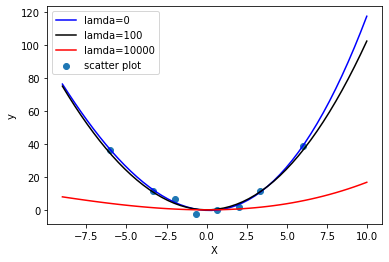

In [189]:
x=np.linspace(-9,10)
y_1=theta_1[0]
for i in range(1,4):
  y_1=y_1+theta_1[i]*x**(i)
y_2=theta_2[0]
for i in range(1,4):
  y_2=y_2+theta_2[i]*x**(i)
y_3=theta_3[0]
for i in range(1,4):
  y_3=y_3+theta_3[i]*x**(i)
plt.plot(x,y_1,'b')
plt.plot(x,y_2,'k')
plt.plot(x,y_3,'r')
plt.scatter(data['X1'],y)
plt.legend(['lamda=0','lamda=100','lamda=10000','scatter plot '])
plt.xlabel('X')
plt.ylabel('y')

Use same data "dataWeek4Train.npz" for training the model and "dataWeek4Test.npz" for validating the model for all three models4

In the following exercises you can use inbuilt regressionn functions from sklearn

## PREDICTIONS 

In [190]:
x=[data_test[0][0],data_test[1][0]]
y_pred_1=[theta_1[0],theta_1[0]]
for i in range(1,4):
  y_pred_1=np.array(y_pred_1)+np.array([theta_1[i]*j**(i) for j in x])
y_pred_2=[theta_2[0],theta_2[0]]
for i in range(1,4):
  y_pred_2=np.array(y_pred_2)+np.array([theta_2[i]*j**(i) for j in x])
y_pred_3=[theta_3[0],theta_3[0]]
for i in range(1,4):
  y_pred_3=np.array(y_pred_3)+np.array([theta_3[i]*j**(i) for j in x])

Text(0, 0.5, 'MSE')

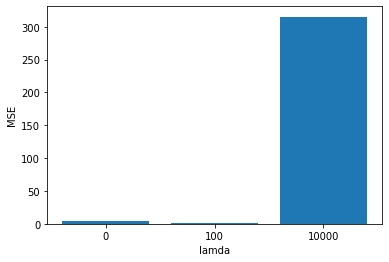

In [191]:
from sklearn.metrics import mean_squared_error
mse=[]
mse.append(mean_squared_error(y_pred_1,data_test[:,1]))
mse.append(mean_squared_error(y_pred_2,data_test[:,1]))
mse.append(mean_squared_error(y_pred_3,data_test[:,1]))
plt.bar(['0','100','10000'],mse)
plt.xlabel('lamda')
plt.ylabel('MSE')



##  Linear Regression (Recap)


Write a generic function decribed in the following cell which takes in data, regression type - lasso,ridge and usual linear , degree of the polynomial and then the alpha values (which are regularization parameters -lambda $\lambda$ , in sklearn they are named as alpha so its just a notaitonal difference).



Hint: Use PolynomialFeatures from sklearn and set bias to Flase

Use 9 degree polynomial features to fit the data using Linear Rigression. Comment on the fit of the model (Overfit, underfit, perfect fit) and also plot prediction on training data along with ground truth

In [192]:
X=data['X'].to_numpy().reshape(-1,1)
y=data['y'].to_numpy().reshape(-1,1)
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
def regression(X,y,reg_type ,degree ,alpha):
  polynomial_features= PolynomialFeatures(degree=degree,include_bias=False)
  x_poly = polynomial_features.fit_transform(X)
  if reg_type=='ridge':
    rid=Ridge(alpha=alpha)
    rid.fit(x_poly,y)
    Y_hat=rid.predict(x_poly)
    mse=mean_squared_error(y,Y_hat)
    coef=rid.coef_
    model=rid
  elif reg_type=='lasso':
    las=Lasso(alpha=alpha)
    las.fit(x_poly,y)
    Y_hat=las.predict(x_poly)
    mse=mean_squared_error(y,Y_hat)
    coef=las.coef_
    model=las
  elif reg_type=='linear':
    reg=LinearRegression().fit(x_poly,y)
    Y_hat=reg.predict(x_poly)
    mse=mean_squared_error(y,Y_hat)
    coef=reg.coef_
    model=reg
  return Y_hat, mse, coef, model

## PLOTS 

In [193]:
[Y_hat_Lasso,mse_Lasso,coef_Lasso,model_Lasso]=regression(X,y,"lasso",9,0.1)
[Y_hat_Ridge,mse_Ridge,coef_Ridge,model_Ridge]=regression(X,y,"ridge",9,0.1)
[Y_hat_linear,mse_linear,coef_linear,model_linear]=regression(X,y,"linear",9,0.1)

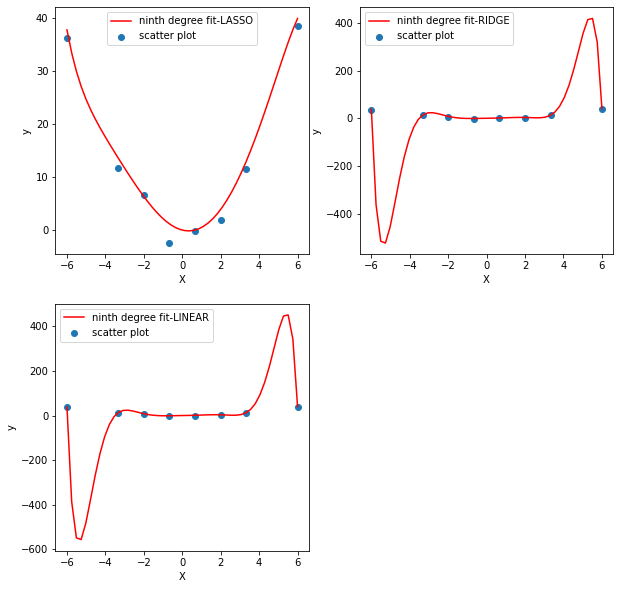

In [194]:
x=np.linspace(-6,6)
x2=np.linspace(-6,6)
x3=np.linspace(-6,6)
y_pred_Lasso=0
y_pred_Ridge=0
y_pred_linear=0
for i in range(9):
  y_pred_Lasso=y_pred_Lasso+coef_Lasso[i]*x**(i+1)
  y_pred_Ridge=y_pred_Ridge+coef_Ridge[0][i]*x2**(i+1)
  y_pred_linear=y_pred_linear+coef_linear[0][i]*x2**(i+1)
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.plot(x,y_pred_Lasso,'r')
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.legend(['ninth degree fit-LASSO','scatter plot'])
plt.subplot(2,2,2)
plt.plot(x,y_pred_Ridge,'r')
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.legend(['ninth degree fit-RIDGE','scatter plot'])
plt.subplot(2,2,3)
plt.plot(x,y_pred_linear,'r')
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.legend(['ninth degree fit-LINEAR','scatter plot'])

### THE LINEAR REGRESSION WITH DEGREE 9 IS AN OVERFIT MODEL

## Ridge Rigression and Lasso for polynomial fitting with degree 9
In previous you observed that how the model has fit the training data, now try the same thing using regularization both Ridge and Lasso. Use the generic function that you wrote in previous cell.

 - Now use polynomial regression of order 9 along with Ridge regression and Lasso regression on "dataWeek4Train.npz" for $\lambda= [0, 1, 10^5, 10^{10}]$ and plot the true vs predicted values for each $\lambda$ (Note here that in sklearn lambda is alpha)

- Plot the prediction on training data along with ground truth for various values of $\lambda$ for both ridge and lasso. And also print the coefficients of model for each $\lambda$

- Also plot trainning error vs $\lambda$

Note : Here you can use ridge Rigression from sklearn and also set bias to False in polynomial features  
- You can use library to generate polynomial features


### Lasso Regression

$$\hat{\theta} = argmin_{\theta}(\frac{1}{2} \sum_{i=1}^{N} (y_i-\theta_0-\sum_{j=1}^p x_{ij}\theta_j)^2 + \lambda \sum_{j=1}^{p}|\theta_j|)$$

### Plots

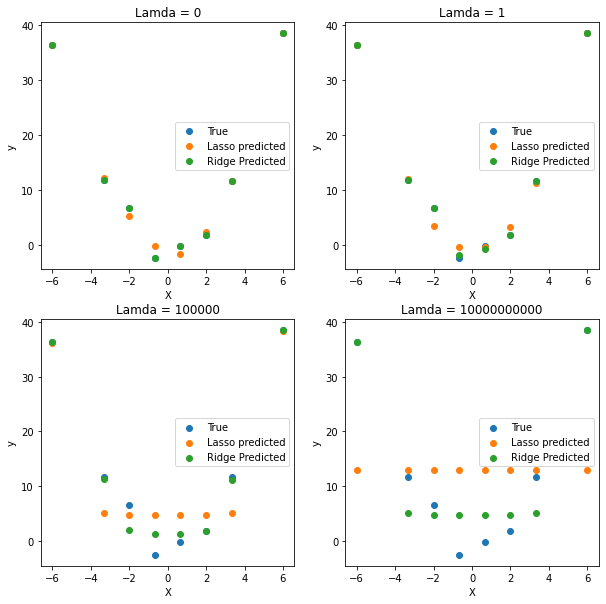

In [195]:

j=1
plt.figure(figsize=[10,10])
for i in [0,1,10**5,10**10]:
  plt.subplot(2,2,j)
  plt.title('Lamda = '+str(i))
  plt.scatter(X,y)
  plt.scatter(X,regression(X,y,"lasso",9,i)[0])
  plt.scatter(X,regression(X,y,"ridge",9,i)[0])
  plt.xlabel('X')
  plt.ylabel('y')
  plt.legend(['True','Lasso predicted','Ridge Predicted'])
  j=j+1

### Coefficients for different lamdas

#LASSO


In [196]:
for i in [0,1,10**5,10**10]: 
  print('for lamda = '+str(i)+' coefficient for lasso is ',regression(X,y,"lasso",9,i)[2])

for lamda = 0 coefficient for lasso is  [-1.14550678e+00  1.38499965e+00  1.05999422e-01 -1.81842662e-02
 -4.77370916e-04  1.79761406e-04 -2.83996252e-05  2.57116824e-06
 -3.25364936e-07]
for lamda = 1 coefficient for lasso is  [-0.00000000e+00  9.45360808e-01 -2.85468333e-02  1.97430837e-02
  1.77747810e-03 -3.71187319e-04 -1.30398605e-05 -2.44338732e-06
 -2.90013643e-07]
for lamda = 100000 coefficient for lasso is  [-0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.93067649e-05
  1.03278897e-07]
for lamda = 10000000000 coefficient for lasso is  [0. 0. 0. 0. 0. 0. 0. 0. 0.]


## RIDGE


In [197]:
for i in [0,1,10**5,10**10]:
  print('for lamda = '+str(i)+' coefficient for ridge is ',regression(X,y,"ridge",9,i)[2])

for lamda = 0 coefficient for ridge is  [[ 1.55314274e+00  1.60951206e-01  4.42678586e-01  4.86392700e-01
  -4.54837004e-01 -4.55959473e-02  4.68977643e-02  9.10977309e-04
  -9.62066756e-04]]
for lamda = 1 coefficient for ridge is  [[ 7.44119842e-01  1.59227541e-01  1.92022890e-01  4.81193662e-01
  -2.78417219e-01 -4.49908475e-02  2.98149989e-02  8.98201193e-04
  -6.17817805e-04]]
for lamda = 100000 coefficient for ridge is  [[-7.44481536e-05  2.43355499e-04 -3.10644737e-04  1.58106688e-03
  -8.54353734e-04  9.95073541e-03  6.17908866e-05 -2.56149945e-04
  -9.43202848e-07]]
for lamda = 10000000000 coefficient for ridge is  [[-8.41944511e-10  1.37336483e-08 -4.10293246e-09  1.60946222e-07
  -1.85729179e-08  1.78835737e-06 -8.15144653e-08  1.94013952e-05
   1.09490809e-07]]


## TRAINING ERROR (MSE) 

### RIDGE

[2.130272498316624e-08,
 0.08781454005993469,
 4.876340595787303,
 22.052172303271583]

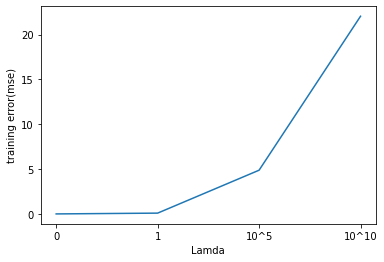

In [198]:
mse=[]
for i in [0,1,10**5,10**10]:
  mse.append(regression(X,y,"ridge",9,i)[1])
plt.plot([0,1,2,3],mse)
plt.xticks(np.arange(4), ('0', '1', '10^5', '10^10'));
plt.ylabel('training error(mse)')
plt.xlabel('Lamda')
mse

## LASSO

[1.1955261089328686, 2.0460671132532804, 22.07614905729678, 222.2019597550688]

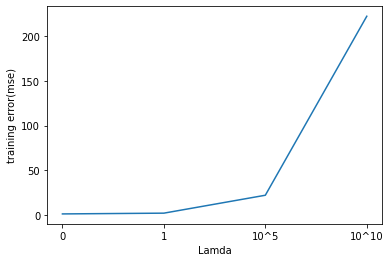

In [199]:
mse=[]
for i in [0,1,10**5,10**10]:
  mse.append(regression(X,y,"lasso",9,i)[1])
plt.plot([0,1,2,3],mse)
plt.xticks(np.arange(4), ('0', '1', '10^5', '10^10'));
plt.ylabel('training error(mse)')
plt.xlabel('Lamda')
mse

## Ridge Rigression and Lasso for polynomial fitting to predict on validation set

Now use "dataWeek4Test.npz" to validate the model for same values of $\lambda$s ($\lambda= [0, 1, 10^5, 10^{10}]$) used in previous case. And plot $\lambda$ vs validation error.  
- Note : No need to plot the prediction on validation set since the validation points are very few
- Print the learned coefficients for Lasso and Ridge rigression and write your observations

Hint: Think of the property of Lasso Rigression (for writing observations)

In [200]:
data_test = np.load("dataWeek4Test.npz")
a=[]
for item in data_test.files:
  a.append(data_test[item])
x=a[0]
y_1=a[1]
data_test=pd.DataFrame({'X':x,'y':y_1})
x=data_test['X'].to_numpy()
x=x.reshape(-1,1)
polynomial_features= PolynomialFeatures(degree=9,include_bias=False)
x_poly = polynomial_features.fit_transform(x)

### LASSO

Text(0.5, 0, 'Lamda')

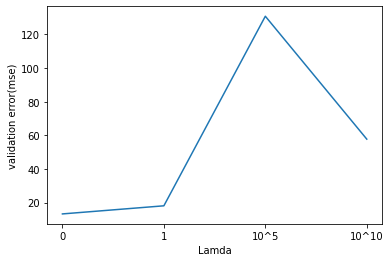

In [201]:
mse=[]
for i in [0,1,10**5,10**10]:
  polynomial_features= PolynomialFeatures(degree=9,include_bias=False)
  x_poly = polynomial_features.fit_transform(x)
  y_test_pred=regression(X,y,"lasso",9,i)[3].predict(x_poly)
  mse.append(mean_squared_error(data_test['y'],y_test_pred))
plt.plot([0,1,2,3],mse)
plt.xticks(np.arange(4), ('0', '1', '10^5', '10^10'));
plt.ylabel('validation error(mse)')
plt.xlabel('Lamda')

### RIDGE

Text(0.5, 0, 'Lamda')

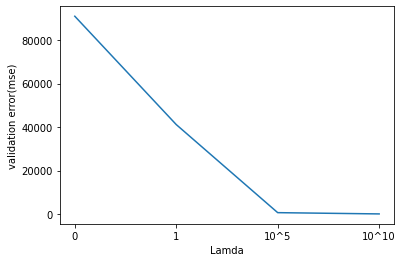

In [202]:
mse=[]
for i in [0,1,10**5,10**10]:
  polynomial_features= PolynomialFeatures(degree=9,include_bias=False)
  x_poly = polynomial_features.fit_transform(x)
  y_test_pred=regression(X,y,"ridge",9,i)[3].predict(x_poly)
  mse.append(mean_squared_error(data_test['y'],y_test_pred))
plt.plot([0,1,2,3],mse)
plt.xticks(np.arange(4), ('0', '1', '10^5', '10^10'));
plt.ylabel('validation error(mse)')
plt.xlabel('Lamda')

### Coefficients Observation:

## **Lasso and Ridge Observation**
#### All the coefficients value approaches 0, when the lambda value increases. This is because the regularization term is a modulus function which gives a diamond shaped cost function and this minimizes at exactly **zero** because of sharp corners. But ridge coefficients doest take an exact zero value this is because of circle cost function.

In [204]:
for i in [0,1,10**5,10**10]:
  print('for lamda = '+str(i)+' coefficient for lasso is ',regression(X,y,"lasso",9,i)[2])
for i in [0,1,10**5,10**10]:
  print('for lamda = '+str(i)+' coefficient for ridge is ',regression(X,y,"ridge",9,i)[2])

for lamda = 0 coefficient for lasso is  [-1.14550678e+00  1.38499965e+00  1.05999422e-01 -1.81842662e-02
 -4.77370916e-04  1.79761406e-04 -2.83996252e-05  2.57116824e-06
 -3.25364936e-07]
for lamda = 1 coefficient for lasso is  [-0.00000000e+00  9.45360808e-01 -2.85468333e-02  1.97430837e-02
  1.77747810e-03 -3.71187319e-04 -1.30398605e-05 -2.44338732e-06
 -2.90013643e-07]
for lamda = 100000 coefficient for lasso is  [-0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.93067649e-05
  1.03278897e-07]
for lamda = 10000000000 coefficient for lasso is  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
for lamda = 0 coefficient for ridge is  [[ 1.55314274e+00  1.60951206e-01  4.42678586e-01  4.86392700e-01
  -4.54837004e-01 -4.55959473e-02  4.68977643e-02  9.10977309e-04
  -9.62066756e-04]]
for lamda = 1 coefficient for ridge is  [[ 7.44119842e-01  1.59227541e-01  1.92022890e-01  4.81193662e-01
  -2.78417219e-01 -4.49908475e-02  2.98149989e-02  8.9

### Questions and Observations

- **What was your observation in simple linear rigression without regulaization when polynomial features of degree of 9 is used and what is the reason?**

Ans: Without regularization the linear regression with polynomial features of degree 9 is an overfit model. But with regularization the model is less prone to over fit the reason is now the model gives more weightage to the regularization term and tries to minimise it during gradient descent. So the model doesn't fully concentrate on minimizing the cost function. Hence it doesnt overfit.


- **As value of lambda increases what happens to the model complexity?**

Ans: As lambda value increases the model gives more weightage to the regularization term for minimizing. Hence, the parameters will approach low values possible and in turn the bias increases and variance decreases. So the model complexity decreases as lambda increases.

- **What can be infered from the mean squared error versus lambda?**

Ans: The mean squared error first decreases for small lambda, because of the regularization term which decreases the variance. But, with increasing lambda the bias increases even though the variance decreases, which causes the mean squared error to increase. 

- **Statement: Regularization gives finer control over fitting the data than using just change of degree of the polynomial features (True or False) Justify (not mathematical)**

Ans: TRUE. The regularized model is more preferred over changing degree of polynomial features. This is because the regularized model not only helps in reducing the overfit, it also decreases the coefficients of unnecessary features to zero. Which helps to reduce the model complexity and also the model performs well with validation data.

But if we reduce the degree of polynomial we can achieve a reduce in variance, but feature selection is not possible in this case. Because each coefficient has a value. 

- **Comment on the train error vs $\lambda$ and validation error vs $\lambda$ what are the observations?**

Ans: Train error first decreases for small lambda and then increases for large lambda. But the validation error in the case of ridge decreases with lambda but in the case of lasso the validation error first increases with lambda and then decreased for large lambda. 
